**Machine Learning Basic Steps**

* Define: What type of model will it be? A decision tree? Some other type of model? Some other parameters of the model type are specified too.
* Setup: Split the Data
* Fit: Capture patterns from provided data. This is the heart of modeling.
* Predict: Just what it sounds like
* Evaluate: Determine how accurate the model's predictions are.

- The standard procedure is __y__ is the predictive outcome and **X** is the list of Feature columns
- The **Validation Data** separates the training and testing data to reduce overfitting; a random state is included to repeat results
- 

In [50]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

#load data
melbourne_data = pd.read_csv("Documents\GitHub\wine-reviews\melb_data.csv") 
# Filter rows with missing price values
filtered_melbourne_data = melbourne_data.dropna(axis=0)

In [46]:
# Choose target and features
y = filtered_melbourne_data.Price
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'BuildingArea', 
                        'YearBuilt', 'Lattitude', 'Longtitude']
X = filtered_melbourne_data[melbourne_features]

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)



242647.27234006047


### Mean Absolute Error

In [4]:
### Evaluate Model

from sklearn.metrics import mean_absolute_error

#get prediction if done on whole dataset
predicted_home_prices = melbourne_model.predict(X)
mean_absolute_error(y, predicted_home_prices)

# get predicted prices on validation data
val_predictions = melbourne_model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))


256133.8921885087


Create an **MAE function** to determine the best number of leaves for model for a single regression model; we will be graphing it through a range of values

In [43]:
##Createa function
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

import matplotlib.pyplot as plt

# create a range of values and then narrow down the region
#Strategy; check small numbers; if declining then pick large number
#V = range(5,100,5) # its decreasing so larger numbers
#V = range(100,4000,100) #its near 400 or near 600
V = range(300,450,1) #its betweeen 360 and 380
V = range(360,370,1) #its 367
V = range(600,700,1)
V = range(638,655,1) #its 639
my_mae= []
for max_leaf_nodes in V:
    my_mae.append(get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y))

#plt.plot(V, my_mae)

print(get_mae(367, train_X, val_X, train_y, val_y))
print(get_mae(652, train_X, val_X, train_y, val_y))

#367 is the winner

241027.95803757792
242401.22706324098


In [47]:
# Define model
melbourne_model = DecisionTreeRegressor(max_leaf_nodes=367) # this was determined by calculating the optimal leaf to reduce error
# Fit model
melbourne_model.fit(train_X, train_y)

# get predicted prices on validation data
val_predictions = melbourne_model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))

243724.64051639644


   ### Random Forest

In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
melb_preds = forest_model.predict(val_X)
print(mean_absolute_error(val_y, melb_preds))

C:\Users\17189\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


202888.18157951365


202770.65120669402


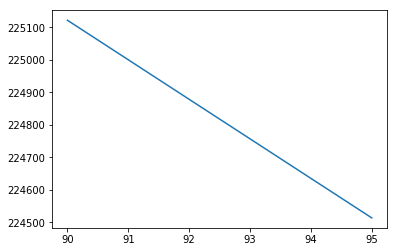

In [55]:
##Createa function
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = RandomForestRegressor(max_leaf_nodes=max_leaf_nodes, random_state=1)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

import matplotlib.pyplot as plt

# create a range of values and then narrow down the region
#Strategy; check small numbers; if declining then pick large number
V = range(90,100,5) # its decreasing so larger numbers
#V = range(100,5000,100) 
my_mae= []
for max_leaf_nodes in V:
    my_mae.append(get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y))

#plt.plot(V, my_mae)

#print(get_mae(1200, train_X, val_X, train_y, val_y))
#print(get_mae(652, train_X, val_X, train_y, val_y))

#367 is the winner

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(max_leaf_nodes,random_state=1)
forest_model.fit(train_X, train_y)
melb_preds = forest_model.predict(val_X)
print(mean_absolute_error(val_y, melb_preds))